<a href="https://colab.research.google.com/github/Ira-a02/DataAnalysis/blob/main/ml9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_recall_curve

In [4]:
from google.colab import files
files.upload()

Saving classification.csv to classification.csv
Saving scores.csv to scores.csv


{'classification.csv': b'true,pred\n1,0\n1,1\n1,1\n0,0\n1,1\n1,1\n1,1\n0,1\n0,0\n0,1\n1,0\n0,1\n1,1\n0,1\n0,0\n0,1\n1,1\n0,1\n0,0\n0,0\n0,1\n1,1\n1,1\n1,0\n0,0\n0,0\n1,1\n1,1\n0,0\n1,0\n1,0\n1,1\n0,0\n0,0\n1,1\n0,1\n0,0\n1,1\n0,0\n1,0\n0,1\n0,1\n1,1\n0,1\n1,0\n0,0\n0,0\n1,0\n0,0\n1,1\n1,0\n0,0\n1,0\n1,0\n0,0\n1,0\n1,0\n1,0\n1,0\n1,0\n1,1\n0,0\n1,1\n1,1\n0,0\n1,0\n1,0\n1,1\n0,0\n0,1\n1,0\n0,0\n0,1\n1,1\n0,1\n0,0\n0,1\n0,0\n0,0\n0,0\n1,0\n1,1\n1,1\n1,1\n1,1\n0,1\n0,0\n1,1\n1,0\n0,0\n1,0\n1,0\n1,0\n0,0\n1,1\n1,0\n0,0\n1,1\n1,0\n1,0\n1,0\n1,0\n1,1\n1,0\n1,0\n0,1\n0,1\n0,0\n1,1\n1,0\n1,1\n1,0\n0,0\n1,0\n0,1\n0,0\n0,1\n1,0\n0,0\n1,1\n0,0\n1,1\n1,1\n1,0\n0,0\n1,1\n0,0\n0,0\n0,0\n0,1\n1,0\n0,0\n1,1\n0,1\n0,0\n0,1\n1,0\n0,0\n0,1\n1,0\n1,1\n0,0\n1,0\n0,1\n0,0\n0,0\n1,1\n0,1\n1,0\n0,0\n1,0\n0,0\n1,0\n0,1\n0,1\n0,1\n0,0\n0,0\n0,0\n0,0\n0,0\n1,1\n1,1\n1,0\n1,0\n1,0\n1,0\n0,1\n1,1\n1,0\n1,1\n0,0\n0,0\n0,0\n0,0\n0,0\n1,0\n0,1\n0,0\n1,0\n0,1\n0,0\n0,0\n1,0\n0,1\n0,0\n1,0\n1,0\n0,0\n1,0\n1,0\n1,0\n1,0\

 1. Загрузите файл classification.csv. В нем записаны истинные классы
 объектов выборки (колонка true) и ответы некоторого классифика
тора (колонка predicted).

In [32]:
df_y = pd.read_csv('classification.csv')
df_y

,true,pred
0,1,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
195,0,0
196,0,0
197,1,0
198,0,1


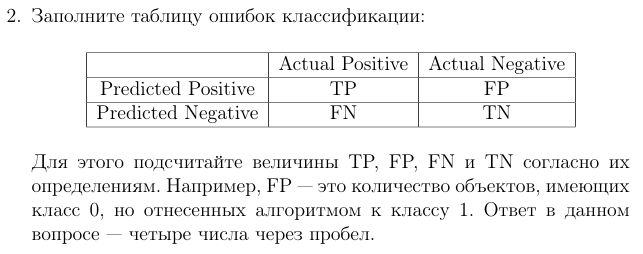

In [23]:
y = df_y['true']
y_pred = df_y['pred']
tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
print(tp, fp, fn, tn)

43 34 59 64


 3. Посчитайте основные метрики качества классификатора:
 * Accuracy (доля верно угаданных) sklearn.metrics.accuracy
 * Precision (точность)
sklearn.metrics.accuracy.precision_score
 * Recall (полнота) sklearn.metrics.recall_score
 * F-мера sklearn.metrics.f1_score

In [30]:
accuracy = round(accuracy_score(y, y_pred),2)
precision = round(precision_score(y, y_pred), 2)
recall = round(recall_score(y, y_pred), 2)
f1 = round(f1_score(y, y_pred), 2)
print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")

Accuracy: 0.54, Precision: 0.56, Recall: 0.42, F1 Score: 0.48


4. Имеется четыре обученных классификатора. В файле scores.csv записаны истинные классы и значения степени принадлежности положительному классу для каждого классификатора на некоторой выборке:
 * для логистической регрессии вероятность положительного
 класса (колонка score_logreg),
 * для SVM отступотразделяющей поверхности (колонкаscore_svm),
 * для метрического алгоритма взвешенная сумма классов соседей (колонка core_knn),
 * для решающего дерева доля положительных объектов в листе (колонка score_tree)
  Загрузите этот файл

In [33]:
df = pd.read_csv('scores.csv')
df

,true,score_logreg,score_svm,score_knn,score_tree
0,0,0.683832,0.145976,0.787063,0.500000
1,1,0.801966,0.239511,1.000000,0.833333
2,0,0.382315,-0.245701,0.000000,0.000000
3,1,0.506797,-0.137058,0.000000,0.105263
4,1,0.488781,-0.154148,0.000000,0.105263
...,...,...,...,...,...
195,0,0.573801,-0.088203,0.284192,0.400000
196,0,0.624422,-0.012315,0.205437,0.400000
197,1,0.425538,-0.135673,0.382351,0.700000
198,0,0.905270,0.583806,1.000000,1.000000


 5. Посчитайте площадь под ROC-кривой для каждого классифика
тора. Какой классификатор имеет наибольшее значение метрики
 AUC-ROC (укажите название столбца с ответами этого классифи
катора)? Воспользуйтесь функцией sklearn.metrics.roc_auc_score

In [52]:
logreg = roc_auc_score(df['true'], df['score_logreg'])
svm = roc_auc_score(df['true'], df['score_svm'])
knn = roc_auc_score(df['true'], df['score_knn'])
tree = roc_auc_score(df['true'], df['score_tree'])
auc_roc_dict = {
    'Logistic Regression': logreg,
    'SVM': svm,
    'KNN': knn,
    'Decision Tree': tree
}


best_classifier = max(auc_roc_dict, key=auc_roc_dict.get)
best_auc_roc = round(auc_roc_dict[best_classifier], 2)
print(f"Классификатор с наибольшим AUC-ROC: {best_classifier} (AUC-ROC: {best_auc_roc})")

Классификатор с наибольшим AUC-ROC: Decision Tree (AUC-ROC: 0.68)


 6. Какой классификатор достигает наибольшей точности (Precision)
 при полноте (Recall) не менее 70% (укажите название столбца с от
ветами этого классификатора)? Какое значение точности при этом
 получается?

In [46]:
df['score_logreg'] = (df['score_logreg'] >= 0.5).astype(int)
df['score_svm'] = (df['score_svm'] >= 0.5).astype(int)
df['score_knn'] = (df['score_knn'] >= 0.5).astype(int)
df['score_tree'] = (df['score_tree'] >= 0.5).astype(int)

In [ ]:
classifiers = {
    'Logistic Regression': df['score_logreg'],
    'SVM': df['score_svm'],
    'KNN': df['score_knn'],
    'Decision Tree': df['score_tree']
}

best_classifier = None
best_precision = 0


for clf_name, clf_scores in classifiers.items():
    precision, recall, thresholds = precision_recall_curve(df['true'], clf_scores)
    mask = recall >= 0.7
    if any(mask):
        max_precision = precision[mask].max()
        if max_precision > best_precision:
            best_precision = max_precision
            best_classifier = clf_name

best_precision = round(best_precision, 2)
with open('result.txt', 'w') as f:
    f.write(f"{best_classifier} {best_precision}")

print(f"Классификатор с наибольшей точностью при Recall ≥ 0.7: {best_classifier} (Precision: {best_precision})")


In [53]:
classifiers = {
    'Logistic Regression': df['score_logreg'],
    'SVM': df['score_svm'],
    'KNN': df['score_knn'],
    'Decision Tree': df['score_tree']
}
precision_dict = {}

for clf_name, clf_scores in classifiers.items():
    precision, recall, thresholds = precision_recall_curve(df['true'], clf_scores)
    filtered_precisions = precision[recall >= 0.7]
    max_precision = filtered_precisions.max() if filtered_precisions.size > 0 else None

    if max_precision is not None:
        precision_dict[clf_name] = max_precision


best_classifier = max(precision_dict, key=precision_dict.get)
best_precision = round(precision_dict[best_classifier], 2)

with open('result.txt', 'w') as f:
    f.write(f"{best_classifier} {best_precision}")

print(f"Классификатор с наибольшей точностью при Recall ≥ 0.7: {best_classifier} (Precision: {best_precision})")

Классификатор с наибольшей точностью при Recall ≥ 0.7: Logistic Regression (Precision: 0.62)
